# Import Any Required Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Salinan Online Retail Data.csv")
df.head()

,order_id,product_code,product_name,quantity,order_date,price,customer_id
0,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.50,12346.0
1,C493411,21539,RETRO SPOTS BUTTER DISH,-1,2010-01-04 09:43:00,4.25,14590.0
2,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.50,12346.0
3,493413,21724,PANDA AND BUNNIES STICKER SHEET,1,2010-01-04 09:54:00,0.85,NaN
4,493413,84578,ELEPHANT TOY WITH BLUE T-SHIRT,1,2010-01-04 09:54:00,3.75,NaN


# Data Assessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461773 entries, 0 to 461772
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      461773 non-null  object 
 1   product_code  461773 non-null  object 
 2   product_name  459055 non-null  object 
 3   quantity      461773 non-null  int64  
 4   order_date    461773 non-null  object 
 5   price         461773 non-null  float64
 6   customer_id   360853 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 24.7+ MB


Terdapat kesalahan tipe data pada kolom `order_date` yang mana seharusnya bertipe data `datetime64`.

In [4]:
df.isnull().sum()

order_id             0
product_code         0
product_name      2718
quantity             0
order_date           0
price                0
customer_id     100920
dtype: int64

Terdapat lebih dari 100k nilai null pada kolom `customer_id`.

In [5]:
df.describe()

,quantity,price,customer_id
count,461773.000000,461773.000000,360853.000000
mean,9.088892,4.569963,15557.611138
std,86.366467,153.411566,1593.728741
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,14210.000000
50%,3.000000,2.100000,15580.000000
75%,10.000000,4.210000,16938.000000
max,10200.000000,25111.090000,18287.000000


Terdapat nilai negatif pada kolom `quantity` dan `price`. Karena pada proyek ini akan dilakukan analisis terhadap jumlah uang yang telah dikeluarkan oleh pengguna untuk membeli barang, maka semua nilai yang negatif pada kedua kolom tersebut akan dieliminasi.

# Data Cleansing

In [6]:
df_clean = df.copy()
df_clean = df_clean[~df_clean['customer_id'].isnull()]
df_clean['order_date'] = df_clean['order_date'].astype('datetime64')
df_clean = df_clean[~((df_clean['quantity']<0) | (df_clean['price']<0))]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352913 entries, 0 to 461744
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      352913 non-null  object        
 1   product_code  352913 non-null  object        
 2   product_name  352913 non-null  object        
 3   quantity      352913 non-null  int64         
 4   order_date    352913 non-null  datetime64[ns]
 5   price         352913 non-null  float64       
 6   customer_id   352913 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 21.5+ MB


Setelah dilakukan penyesuaian pada data, tipe data dari `order_date` sudah benar dan nilai null pada tiap kolom juga sudah tidak ada lagi.

In [7]:
df_clean.describe()

,quantity,price,customer_id
count,352913.000000,352913.000000,352913.000000
mean,11.944899,3.147210,15562.723870
std,66.928894,31.258771,1593.147387
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,14221.000000
50%,4.000000,1.950000,15584.000000
75%,12.000000,3.750000,16940.000000
max,10000.000000,10953.500000,18287.000000


Nilai minimum pada kolom `quantity` dan `price` sudah tidak ada nilai negatif lagi.

In [8]:
# # Tekan CTRL + A kemudian tekan CTRL + / untuk uncomment kode di bawah
# # Jalankan kode ini jika ingin menghapus nilai outlier
# def outliers_remover(df, numeric_column):
#     q1 = df[numeric_column].quantile(.25)
#     q3 = df[numeric_column].quantile(.75)
    
#     iqr = q3 - q1
    
#     lower_bound = q1 - 1.5 * iqr
#     upper_bound = q3 + 1.5 * iqr
    
#     no_outlier = df[~((df[numeric_column] < lower_bound) | (df[numeric_column] > upper_bound))]
#     return no_outlier

# df_clean = outliers_remover(df_clean, 'price')

# Feature Engineering

Pada tahap ini, akan dilakukan penambahan kolom dengan nama kolom `amount` yang menyimpan nilai hasil perkalian dari kolom `quantity` dan `price`.

In [9]:
df_clean['amount'] = df_clean['quantity'] * df_clean['price']
df_clean.head()

,order_id,product_code,product_name,quantity,order_date,price,customer_id,amount
0,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.50,12346.0,22.5
2,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.50,12346.0,22.5
6,493414,21844,RETRO SPOT MUG,36,2010-01-04 10:28:00,2.55,14590.0,91.8
7,493414,21533,RETRO SPOT LARGE MILK JUG,12,2010-01-04 10:28:00,4.25,14590.0,51.0
8,493414,37508,NEW ENGLAND CERAMIC CAKE SERVER,2,2010-01-04 10:28:00,2.55,14590.0,5.1


# User Segmentation

Karena pada proyek ini hanya akan dilakukan analisis segmentasi pengguna, maka kolom yang akan digunakan adalah `order_id`, `order_date`, `customer_id`, dan `amount`.

In [10]:
df_user = df_clean[['customer_id','order_id','order_date','amount']].copy()
df_user.head()

,customer_id,order_id,order_date,amount
0,12346.0,493410,2010-01-04 09:24:00,22.5
2,12346.0,493412,2010-01-04 09:53:00,22.5
6,14590.0,493414,2010-01-04 10:28:00,91.8
7,14590.0,493414,2010-01-04 10:28:00,51.0
8,14590.0,493414,2010-01-04 10:28:00,5.1


In [11]:
df_user = df_user.groupby('customer_id', as_index=False).agg(order_cnt=('order_id','nunique'),
                                                             latest_order=('order_date','max'),
                                                             total_order_value=('amount','sum'))
df_user

,customer_id,order_cnt,latest_order,total_order_value
0,12346.0,6,2010-06-28 13:53:00,259.36
1,12608.0,1,2010-10-31 10:49:00,415.79
2,12745.0,2,2010-08-10 10:14:00,723.85
3,12746.0,1,2010-06-17 10:41:00,254.55
4,12747.0,14,2010-12-13 10:41:00,4396.24
...,...,...,...,...
3884,18283.0,6,2010-11-22 15:30:00,641.77
3885,18284.0,1,2010-10-04 11:33:00,461.68
3886,18285.0,1,2010-02-17 10:24:00,427.00
3887,18286.0,1,2010-08-20 11:57:00,833.48


Tambahkan kolom baru dengan nama `day_since_last_order` yang menyimpan nilai jarak hari 

In [12]:
today = df_user['latest_order'].max()
df_user['day_since_last_order'] = (today - df_user['latest_order']).dt.days
df_user

,customer_id,order_cnt,latest_order,total_order_value,day_since_last_order
0,12346.0,6,2010-06-28 13:53:00,259.36,178
1,12608.0,1,2010-10-31 10:49:00,415.79,53
2,12745.0,2,2010-08-10 10:14:00,723.85,135
3,12746.0,1,2010-06-17 10:41:00,254.55,189
4,12747.0,14,2010-12-13 10:41:00,4396.24,10
...,...,...,...,...,...
3884,18283.0,6,2010-11-22 15:30:00,641.77,31
3885,18284.0,1,2010-10-04 11:33:00,461.68,80
3886,18285.0,1,2010-02-17 10:24:00,427.00,309
3887,18286.0,1,2010-08-20 11:57:00,833.48,125


Tambahkan kolom baru dengan nama `recency_score` untuk melabeli pengguna sesuai dengan kebaruan transaksinya. Skor yang diberikan adalah nilai dengan rentang 1 - 5 yang mana 1 menunjukkan bahwa pengguna terakhir kali transaksi dalam waktu yang cukup lama sedangkan 5 menunjukkan bahwa pengguna baru-baru ini melakukan transaksi.

In [13]:
df_user['recency_score'] = pd.cut(df_user['day_since_last_order'],
                                 bins=[df_user['day_since_last_order'].min(),
                                  np.percentile(df_user['day_since_last_order'], 20),
                                  np.percentile(df_user['day_since_last_order'], 40),
                                  np.percentile(df_user['day_since_last_order'], 60),
                                  np.percentile(df_user['day_since_last_order'], 80),
                                  df_user['day_since_last_order'].max()
                                 ],
                                 labels=range(5,0,-1),
                                 include_lowest=True).astype(int)
df_user

,customer_id,order_cnt,latest_order,total_order_value,day_since_last_order,recency_score
0,12346.0,6,2010-06-28 13:53:00,259.36,178,1
1,12608.0,1,2010-10-31 10:49:00,415.79,53,3
2,12745.0,2,2010-08-10 10:14:00,723.85,135,2
3,12746.0,1,2010-06-17 10:41:00,254.55,189,1
4,12747.0,14,2010-12-13 10:41:00,4396.24,10,5
...,...,...,...,...,...,...
3884,18283.0,6,2010-11-22 15:30:00,641.77,31,4
3885,18284.0,1,2010-10-04 11:33:00,461.68,80,2
3886,18285.0,1,2010-02-17 10:24:00,427.00,309,1
3887,18286.0,1,2010-08-20 11:57:00,833.48,125,2


Tambahkan kolom baru dengan nama `freq_score` untuk melabeli pengguna sesuai dengan seringnya pengguna bertransaksi. Skor yang diberikan adalah nilai dengan rentang 1 - 5 yang mana 1 menunjukkan bahwa pengguna jarang bertransaksi dan 5 menunjukkan bahwa pengguna sering bertransaksi. 

In [14]:
df_user['freq_score'] = pd.cut(df_user['order_cnt'],
                                 bins=[0,
                                  np.percentile(df_user['order_cnt'], 20),
                                  np.percentile(df_user['order_cnt'], 40),
                                  np.percentile(df_user['order_cnt'], 60),
                                  np.percentile(df_user['order_cnt'], 80),
                                  df_user['order_cnt'].max()
                                 ],
                                 labels=range(1,6),
                                 include_lowest=True).astype(int)
df_user

,customer_id,order_cnt,latest_order,total_order_value,day_since_last_order,recency_score,freq_score
0,12346.0,6,2010-06-28 13:53:00,259.36,178,1,4
1,12608.0,1,2010-10-31 10:49:00,415.79,53,3,1
2,12745.0,2,2010-08-10 10:14:00,723.85,135,2,2
3,12746.0,1,2010-06-17 10:41:00,254.55,189,1,1
4,12747.0,14,2010-12-13 10:41:00,4396.24,10,5,5
...,...,...,...,...,...,...,...
3884,18283.0,6,2010-11-22 15:30:00,641.77,31,4,4
3885,18284.0,1,2010-10-04 11:33:00,461.68,80,2,1
3886,18285.0,1,2010-02-17 10:24:00,427.00,309,1,1
3887,18286.0,1,2010-08-20 11:57:00,833.48,125,2,1


In [15]:
df_user['monetary_score'] = pd.cut(df_user['total_order_value'],
                                 bins=[df_user['total_order_value'].min(),
                                  np.percentile(df_user['total_order_value'], 20),
                                  np.percentile(df_user['total_order_value'], 40),
                                  np.percentile(df_user['total_order_value'], 60),
                                  np.percentile(df_user['total_order_value'], 80),
                                  df_user['total_order_value'].max()
                                 ],
                                 labels=range(1,6),
                                 include_lowest=True).astype(int)
df_user

,customer_id,order_cnt,latest_order,total_order_value,day_since_last_order,recency_score,freq_score,monetary_score
0,12346.0,6,2010-06-28 13:53:00,259.36,178,1,4,2
1,12608.0,1,2010-10-31 10:49:00,415.79,53,3,1,2
2,12745.0,2,2010-08-10 10:14:00,723.85,135,2,2,3
3,12746.0,1,2010-06-17 10:41:00,254.55,189,1,1,2
4,12747.0,14,2010-12-13 10:41:00,4396.24,10,5,5,5
...,...,...,...,...,...,...,...,...
3884,18283.0,6,2010-11-22 15:30:00,641.77,31,4,4,3
3885,18284.0,1,2010-10-04 11:33:00,461.68,80,2,1,2
3886,18285.0,1,2010-02-17 10:24:00,427.00,309,1,1,2
3887,18286.0,1,2010-08-20 11:57:00,833.48,125,2,1,3


In [16]:
df_user['segment'] = np.select(condlist=[(df_user['recency_score']==5) & (df_user['freq_score']>=4),
                                         (df_user['recency_score'].between(3,4)) & (df_user['freq_score']>=4),
                                         (df_user['recency_score']>=4) & (df_user['freq_score'].between(2,3)),
                                         (df_user['recency_score'].between(1,2)) & (df_user['freq_score']==5),
                                         (df_user['recency_score']==3) & (df_user['freq_score']==3),
                                         (df_user['recency_score']==5) & (df_user['freq_score']==1),
                                         (df_user['recency_score']==4) & (df_user['freq_score']==1),
                                         (df_user['recency_score'].between(1,2)) & (df_user['freq_score'].between(3,4)),
                                         (df_user['recency_score']==3) & (df_user['freq_score'].between(1,2)),
                                         (df_user['recency_score'].between(1,2)) & (df_user['freq_score'].between(1,2))],
                               choicelist=['01-Champion','02-Loyal Customers','03-Potential Loyalists',
                                           '04-Cant Lose Them','05-Need Attention','06-New Customers',
                                           '07-Promising','08-At Risk','09-About to Sleep','10-Hibernating'])
df_user

,customer_id,order_cnt,latest_order,total_order_value,day_since_last_order,recency_score,freq_score,monetary_score,segment
0,12346.0,6,2010-06-28 13:53:00,259.36,178,1,4,2,08-At Risk
1,12608.0,1,2010-10-31 10:49:00,415.79,53,3,1,2,09-About to Sleep
2,12745.0,2,2010-08-10 10:14:00,723.85,135,2,2,3,10-Hibernating
3,12746.0,1,2010-06-17 10:41:00,254.55,189,1,1,2,10-Hibernating
4,12747.0,14,2010-12-13 10:41:00,4396.24,10,5,5,5,01-Champion
...,...,...,...,...,...,...,...,...,...
3884,18283.0,6,2010-11-22 15:30:00,641.77,31,4,4,3,02-Loyal Customers
3885,18284.0,1,2010-10-04 11:33:00,461.68,80,2,1,2,10-Hibernating
3886,18285.0,1,2010-02-17 10:24:00,427.00,309,1,1,2,10-Hibernating
3887,18286.0,1,2010-08-20 11:57:00,833.48,125,2,1,3,10-Hibernating


Selanjutnya, buat tabel pivot untuk mendapatkan _summary_ dari data di atas.

In [17]:
pd.pivot_table(df_user,
              index='segment',
              values=['customer_id','order_cnt','day_since_last_order','total_order_value'],
              aggfunc={'customer_id':pd.Series.nunique,
                      'order_cnt':[np.mean, np.median],
                      'day_since_last_order':[np.mean, np.median],
                      'total_order_value':[np.mean, np.median]})

customer_id day_since_last_order         order_cnt  \
                           nunique                 mean median       mean   
segment                                                                     
01-Champion                    581            11.662651   11.0  12.583477   
02-Loyal Customers             598            42.372910   38.0   6.780936   
03-Potential Loyalists         402            23.905473   25.0   2.432836   
04-Cant Lose Them               48           125.520833  114.5   9.666667   
05-Need Attention              118            60.135593   61.0   3.000000   
06-New Customers                67            15.044776   17.0   1.000000   
07-Promising                   158            32.930380   34.0   1.000000   
08-At Risk                     335           136.328358  118.0   3.826866   
09-About to Sleep              425            59.317647   59.0   1.425882   
10-Hibernating                1157           193.808124  194.0   1.282627   

                              total_order_value             
                       median              mean     median  
segment                                                     
01-Champion               8.0       6124.362539  2670.5000  
02-Loyal Customers        6.0       2610.200724  1840.0350  
03-Potential Loyalists    2.0        770.257391   621.4855  
04-Cant Lose Them         8.0       3460.575208  2163.8950  
05-Need Attention         3.0       1207.458475   903.6850  
06-New Customers          1.0        268.846269   211.8000  
07-Promising              1.0        309.227342   251.4750  
08-At Risk                4.0       1484.830660  1103.3500  
09-About to Sleep         1.0        515.222729   370.4500  
10-Hibernating            1.0        432.932345   291.5000

# Data Visualization

In [18]:
data_vis_df = df_user.groupby('segment', as_index=False).agg(num_of_cust=('customer_id','nunique'),
                                                            avg_day_since_last_order=('day_since_last_order','mean'),
                                                            order_cnt=('order_cnt','mean'),
                                                            avg_order_value=('total_order_value','mean'))
data_vis_df['percentage'] = data_vis_df['num_of_cust']/data_vis_df['num_of_cust'].sum()
data_vis_df = data_vis_df.sort_values(by='segment', ascending=False)
data_vis_df

,segment,num_of_cust,avg_day_since_last_order,order_cnt,avg_order_value,percentage
9,10-Hibernating,1157,193.808124,1.282627,432.932345,0.297506
8,09-About to Sleep,425,59.317647,1.425882,515.222729,0.109283
7,08-At Risk,335,136.328358,3.826866,1484.830660,0.086140
6,07-Promising,158,32.930380,1.000000,309.227342,0.040627
5,06-New Customers,67,15.044776,1.000000,268.846269,0.017228
4,05-Need Attention,118,60.135593,3.000000,1207.458475,0.030342
3,04-Cant Lose Them,48,125.520833,9.666667,3460.575208,0.012343
2,03-Potential Loyalists,402,23.905473,2.432836,770.257391,0.103368
1,02-Loyal Customers,598,42.372910,6.780936,2610.200724,0.153767
0,01-Champion,581,11.662651,12.583477,6124.362539,0.149396


In [19]:
import matplotlib.pyplot as plt

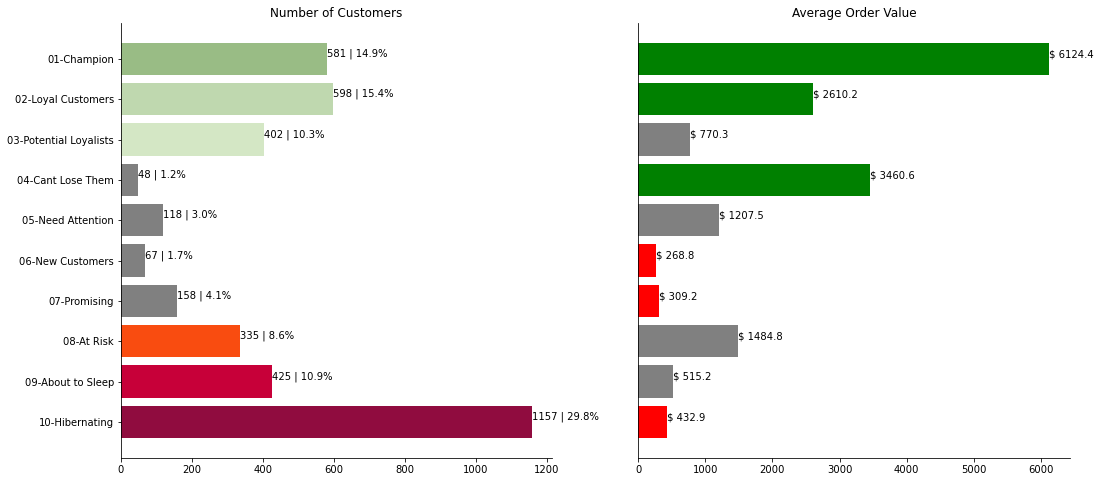

In [20]:
segment = data_vis_df['segment']
num_of_cust = data_vis_df['num_of_cust']
values = data_vis_df['avg_order_value']
percentage = data_vis_df['percentage']

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(17, 8), sharey=True)
colors = ['#900C3F', '#C70039', '#F94C10', 'grey', 'grey', 'grey', 'grey', '#D4E7C5', '#BFD8AF', '#99BC85']
ax1.barh(segment, num_of_cust, color=colors)
ax1.set_title('Number of Customers')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
for i in range(len(segment)):
    ax1.text(num_of_cust[i], segment[i], str(num_of_cust[i])+' | '+str(round(percentage[i]*100, 1))+'%', ha='left', va='bottom')

top_3_order_value = list(values.sort_values(ascending=False).head(3))
bottom_3_order_value = list(values.sort_values(ascending=False).tail(3))
colors2 = []
for value in data_vis_df['avg_order_value']:
    if value in top_3_order_value:
        colors2.append('green')
    elif value in bottom_3_order_value:
        colors2.append('red')
    else:
        colors2.append('grey')
        
        
ax2.barh(segment, values, color=colors2)
ax2.tick_params(left=False)
ax2.set_title('Average Order Value')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
for i in range(len(segment)):
    ax2.text(values[i], segment[i], '$ '+str(round(values[i], 1)), ha='left', va='bottom')
plt.show()

# Conclusion



![RFM](RFM.png)

<center> Source: myskill.id </center>

Setelah dilakukan analisis, berikut kesimpulan yang didapatkan:

1.  Pengguna paling banyak berada pada segmen **Hibernating** (1157 atau 29,8%), **Loyal Customers** (598 atau 15,4%), dan **Champion** (581 atau 14,9%)
2. Program khusus yang fokus pada peningkatan frekuensi transaksi untuk segmen **Potential Loyalists** agar mereka menjadi lebih sering bertransaksi lagi dan naik ke segmen Champion. Tindakan yang dapat dilakukan untuk segmen ini adalah contohnya memberikan  benefit berupa _voucher_ belanja ketika pengguna melakukan transaksi lebih dari _x_ kali.
3. Program khusus yang fokus pada urgensi bertransaksi untuk segmen **Loyal Customers** dapat dibuat untuk membuat mereka bertransaksi kembali dalam waktu dekat sehingga bisa naik ke segmen Champion. Tindakan yang dapat dilakukan adalah dengan meningkatkan keakuratan sistem rekomendasi item sehingga dapat membuat pengguna tertarik dan mulai bertransaksi kembali.
4. Program khusus yang fokus untuk segmen **Hibernating** mengingat banyak pengguna yang berada pada segmen ini dapat dibuat untuk membuat mereka bertransaksi kembali meskipun mereka belum sering bertransaksi sehingga bisa naik ke segmen New Customers atau bahkan Potential Loyalists. Tindakan yang dapat dilakukan untuk segmen ini adalah bisa berupa _Coming back event_.
5. Pada Grafik Average Order Value, dapat diketahui bahwa semakin sering pengguna bertransaksi, nilai rata-rata yang dibelanjakan semakin tinggi. Sebaliknya, semakin jarang pengguna tersebut bertranksi, nilai rata-rata yang dibelanjakan semakin rendah.